<a href="https://colab.research.google.com/github/INCREDIBLE-AURNOB/Predict-personal-medical-cost/blob/main/Personal_medical_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
!pip install opendatasets --quiet

In [123]:

import opendatasets as od
dataset=od.download("https://www.kaggle.com/datasets/mirichoi0218/insurance")

Skipping, found downloaded files in "./insurance" (use force=True to force download)


In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import warnings
warnings.filterwarnings('ignore')

In [125]:
df=pd.read_csv('/content/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [126]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [127]:
df.shape

(1338, 7)

In [128]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex=le.transform(df.sex)
#smoker
le.fit(df.smoker.drop_duplicates())
df.smoker=le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates())
df.region=le.transform(df.region)

<Axes: >

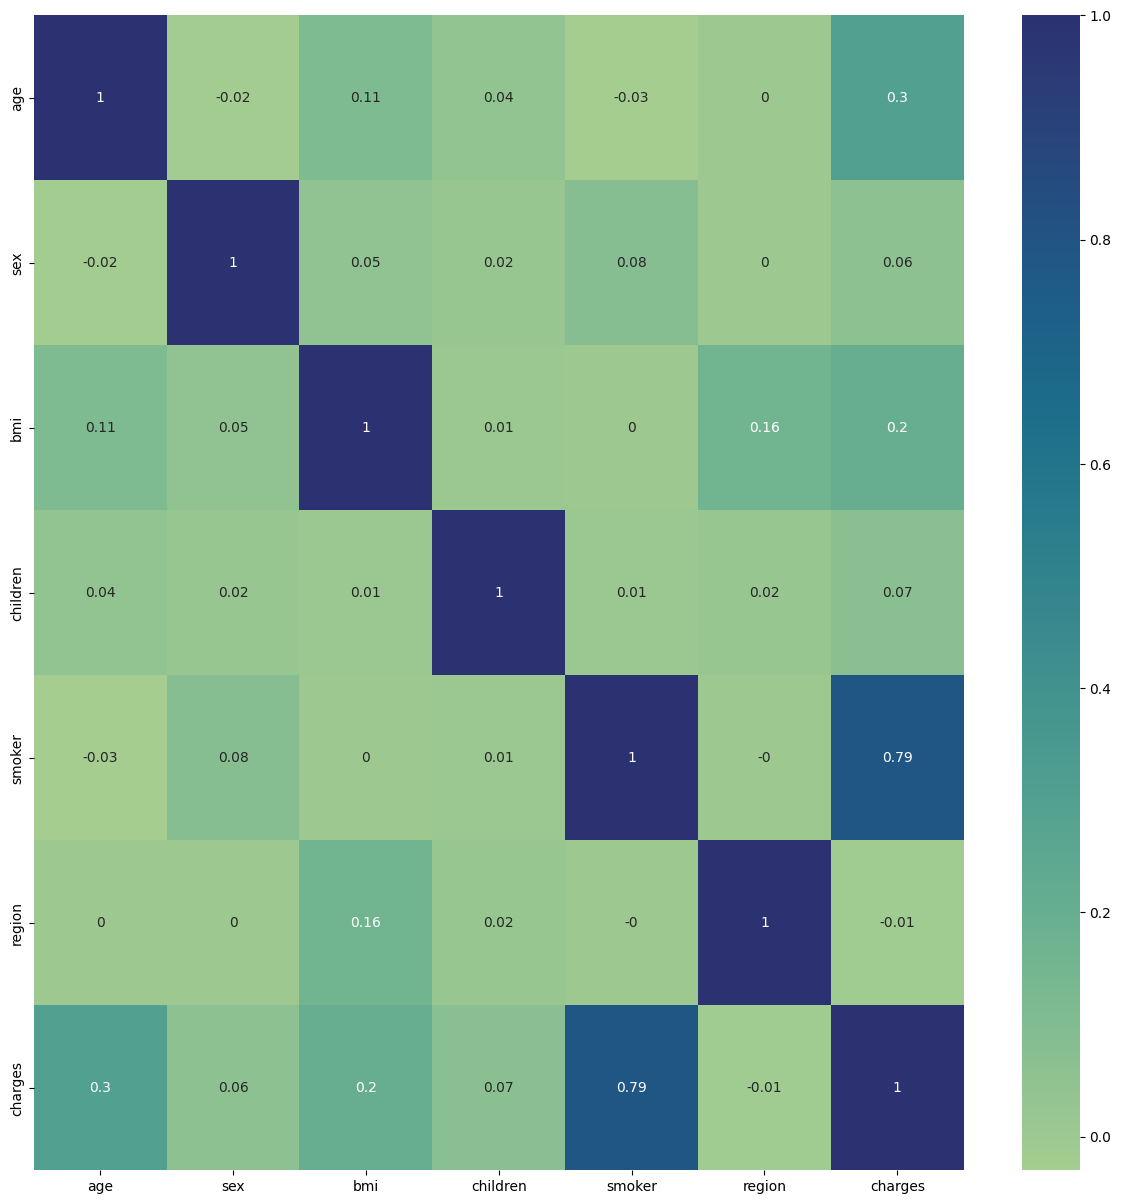

In [129]:
corr=df.corr().round(2)
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='crest')

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

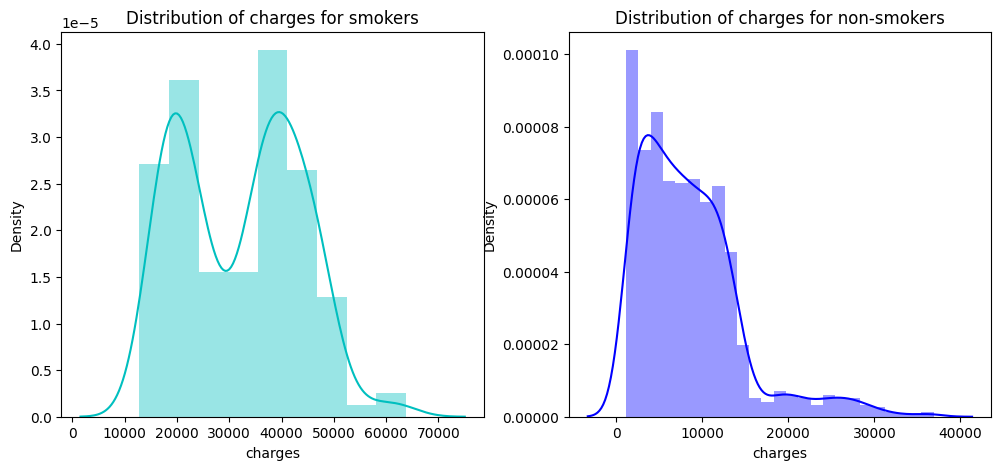

In [130]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

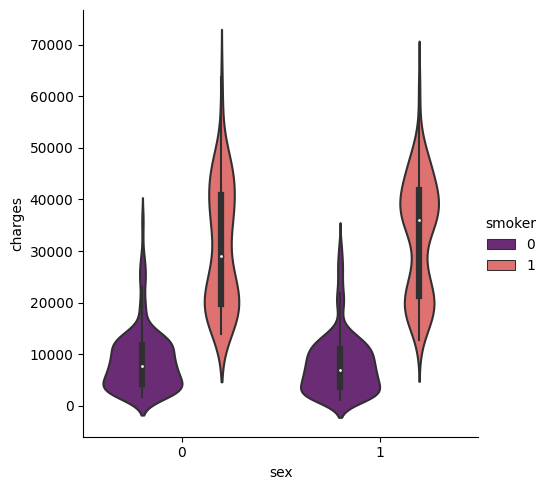

In [131]:
sns.catplot(x="sex",y="charges",hue="smoker",
            kind="violin",data=df,palette='magma')

In [132]:
plot_columns=['age','bmi']

In [133]:
def box_plot(data, columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(20,25))
    for i, col in enumerate(columns):
        sns.boxplot(data[col], ax=axes[i])
        axes[i].set_xlabel(col)
    plt.tight_layout()
    plt.show()

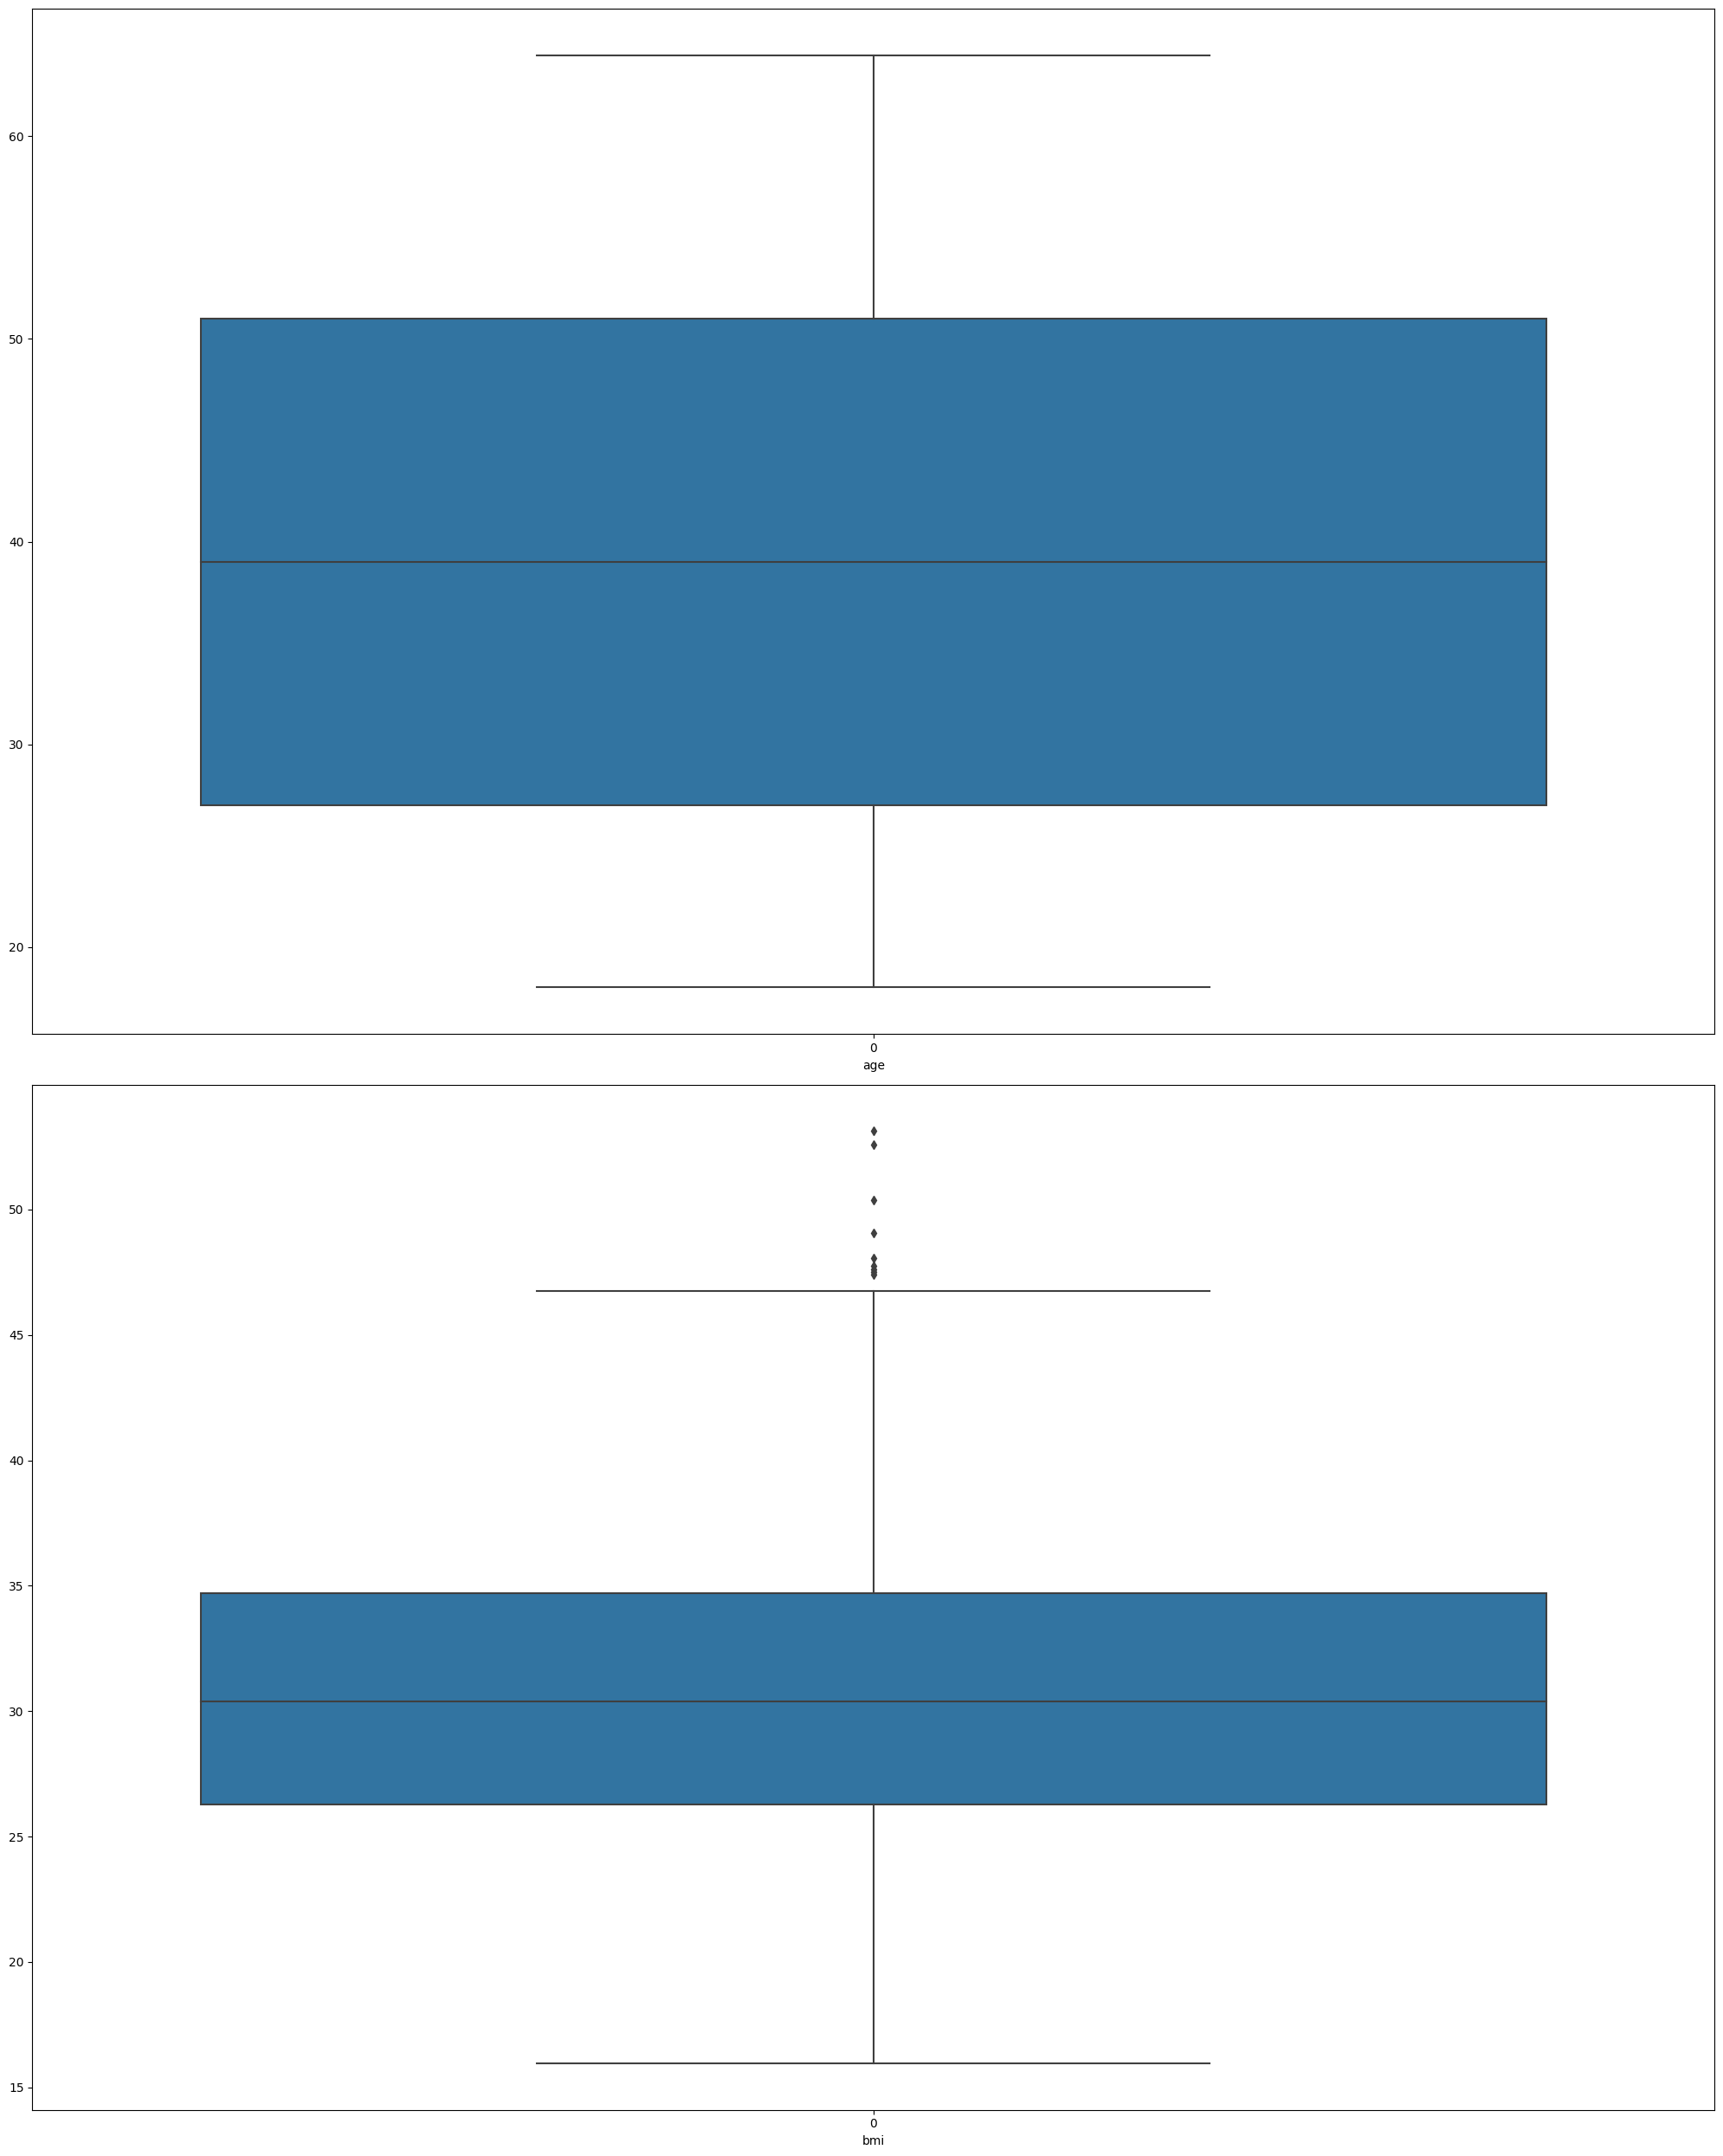

In [134]:
box_plot(df,plot_columns)

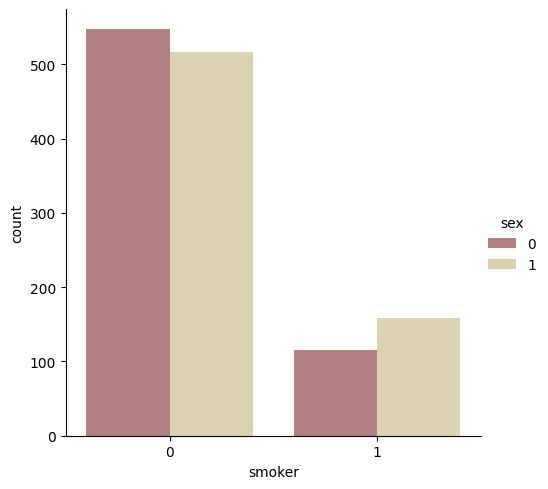

In [135]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df)

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

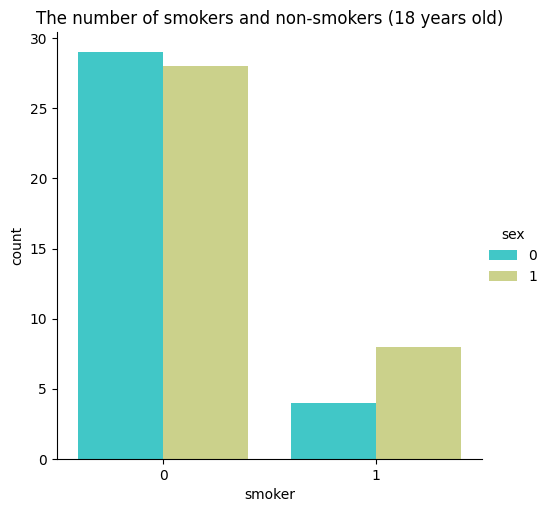

In [136]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=df[(df.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

#### Lets see the charges for amokers and non smokers

<Axes: xlabel='smoker', ylabel='charges'>

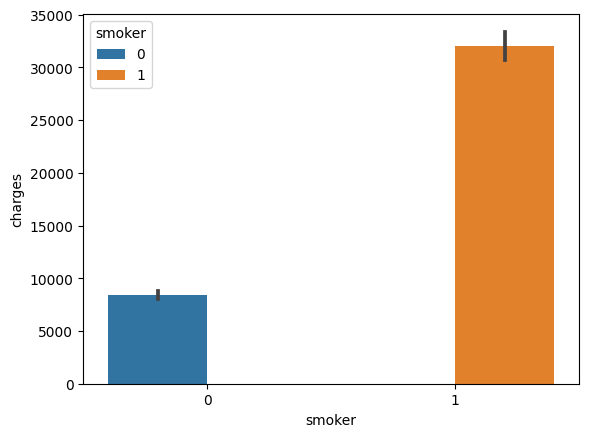

In [137]:
sns.barplot(data=df, x="smoker", y="charges",hue="smoker")

Text(0.5, 1.0, 'Smokers and non-smokers')

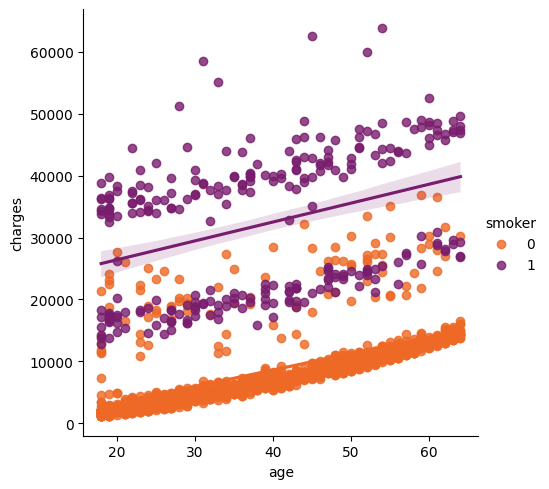

In [138]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'inferno_r')
ax.set_title('Smokers and non-smokers')

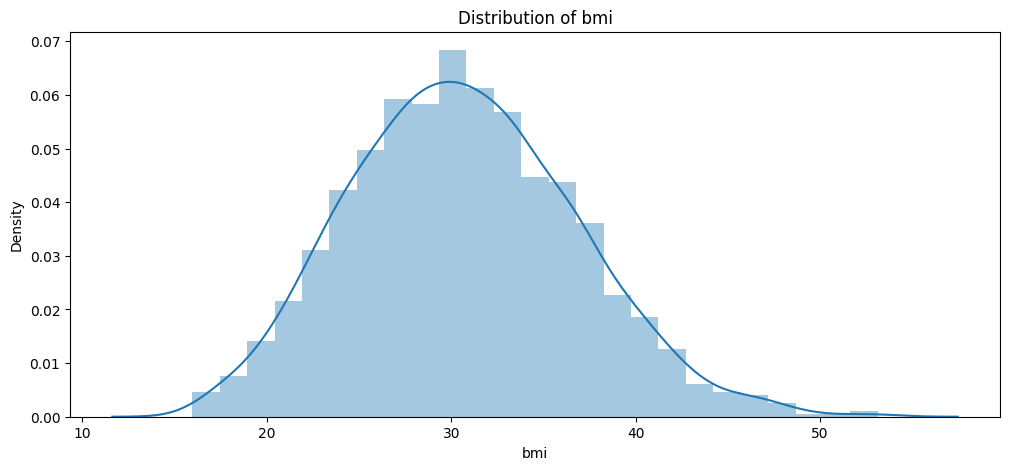

In [139]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(df["bmi"])

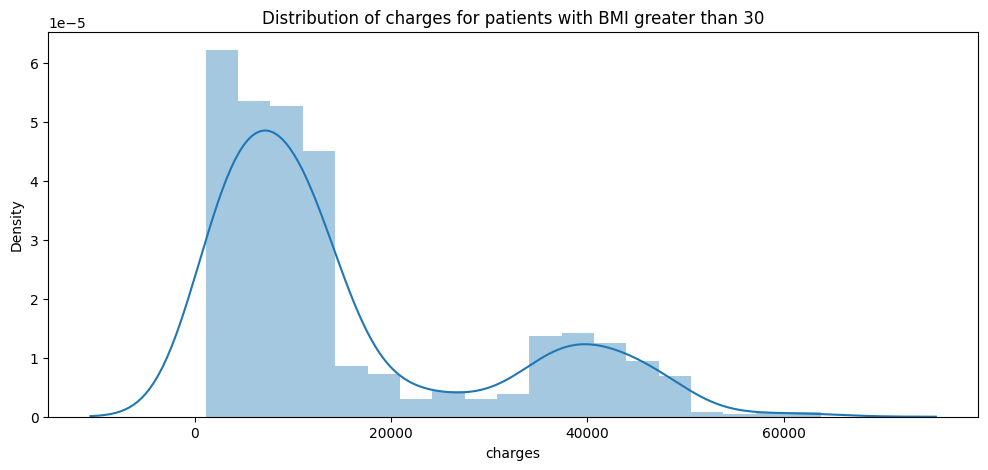

In [140]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(df[(df.bmi >= 30)]['charges'])

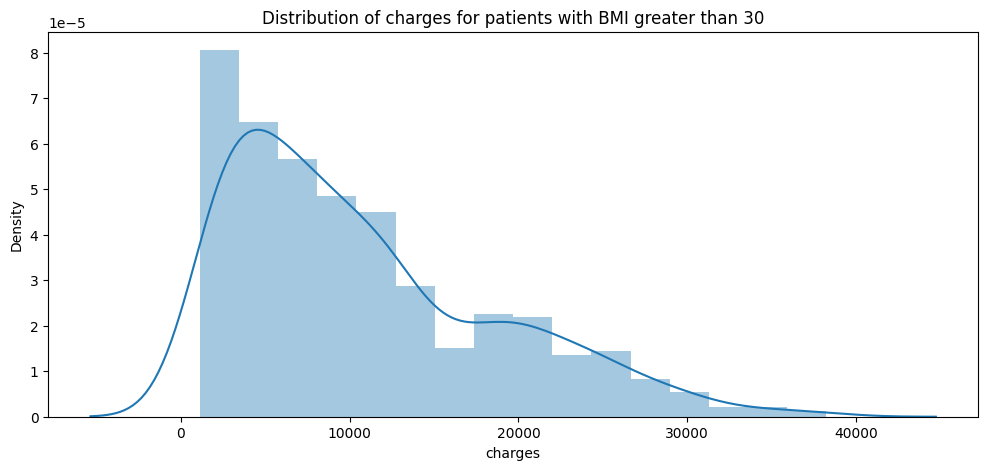

In [141]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(df[(df.bmi < 30)]['charges'])

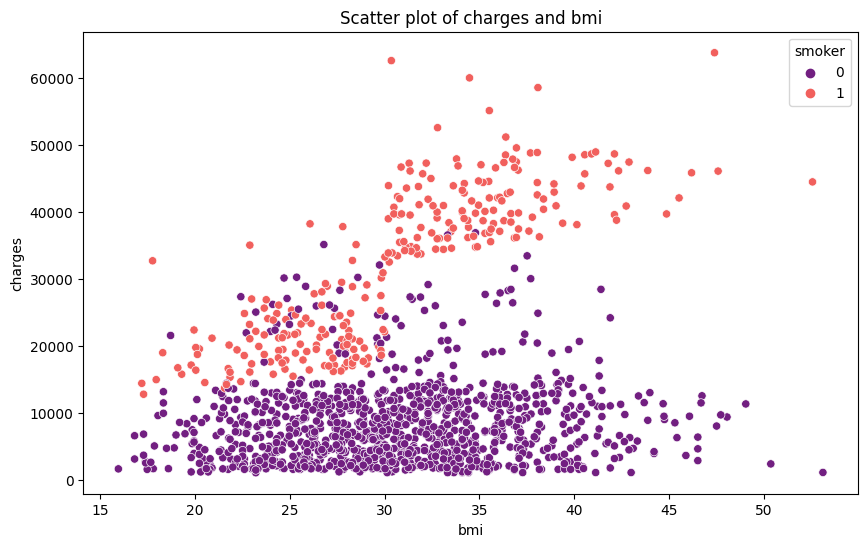

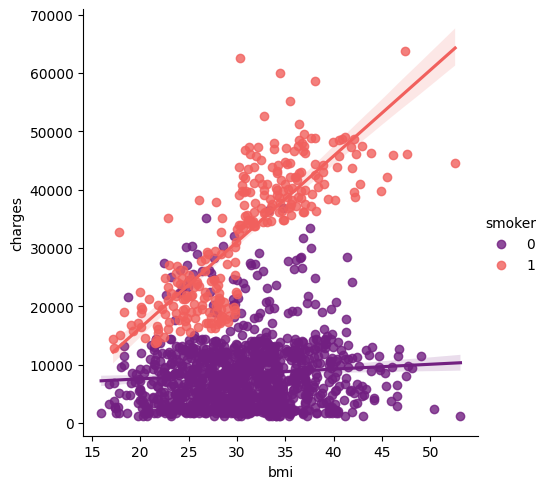

In [142]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'magma')

# Preparing the data

In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [144]:
X=df.drop(['charges'],axis=1)
y=df.charges


In [145]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [146]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [148]:
X_train.shape , X_test.shape

((1070, 6), (268, 6))

In [149]:
y_train.shape ,y_test.shape

((1070,), (268,))

In [150]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [151]:
X_train

array([[ 0.17016366,  0.98700038,  1.04030731,  0.77078248, -0.51165658,
         0.42219728],
       [-1.52421505, -1.01317084,  1.46740183, -0.90381093, -0.51165658,
         0.42219728],
       [-1.45361594,  0.98700038, -0.76351989, -0.06651422,  1.95443593,
        -0.47591622],
       ...,
       [-1.38301683, -1.01317084, -0.31782088, -0.90381093, -0.51165658,
        -1.37402972],
       [-1.45361594,  0.98700038, -2.14672371, -0.90381093, -0.51165658,
        -0.47591622],
       [ 1.29974946,  0.98700038, -0.90184027, -0.90381093, -0.51165658,
        -1.37402972]])

In [160]:
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(n_estimators=100,random_state=1,n_jobs=-1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

In [161]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
Random Forest,2891.756000,29021109.742000,0.761000
XGBoost,3270.723000,33320999.534000,0.726000
Linear Regression,4265.596000,40828425.425000,0.664000
K-nearest Neighbors,3519.106000,46384336.660000,0.618000
Decision Tree,3283.363000,46577799.631000,0.617000
